`Customer Segmentation Analysis`



`Project Description`

`The aim of this data analytics project is to perform customer segmentation analysis for an e-
commerce company. By analyzing customer behavior and purchase patterns, the goal is to
group customers into distinct segments. This segmentation can inform targeted marketing
strategies, improve customer satisfaction, and enhance overall business strategies.`

In [1]:
# Import libraries we need to work with data
import pandas as pd  # To load and manage data
import numpy as np  
import seaborn as sns  # For creating beautiful charts
import matplotlib.pyplot as plt  # For making visualizations
from sklearn.cluster import KMeans  # For clustering (grouping customers)
from sklearn.preprocessing import StandardScaler  # For preparing data for clustering

# Load the dataset (replace 'customer_data.csv' with your actual file)
mydata = pd.read_csv(r"C:\Users\a\Desktop\intership2\Customer Segmentation.csv")




In [2]:
pd.set_option('display.max_columns', None)

In [3]:
print(mydata.head(3))

    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0              172                88            88                  3   
1                2                 1             6                  2   
2              111                21            42                  1   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                8                   10                  4                  7   
1                1                    1                  2                  5   
2                8                    2                 10                  4   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  Ac

In [4]:
mydata.info

<bound method DataFrame.info of        Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0     58138.0        0         0       58       635         88   
1     46344.0        1         1       38        11          1   
2     71613.0        0         0       26       426         49   
3     26646.0        1         0       26        11          4   
4     58293.0        1         0       94       173         43   
...       ...      ...       ...      ...       ...        ...   
2200  61223.0        0         1       46       709         43   
2201  64014.0        2         1       56       406          0   
2202  56981.0        0         0       91       908         48   
2203  69245.0        0         1        8       428         30   
2204  52869.0        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0                 546              172                88            88   
1                   6      

In [5]:
mydata.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.0,2205.0,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,2.318367,4.100680,2.645351,5.823583,5.336961,0.073923,0.074376,0.073016,0.064399,0.013605,0.009070,3.0,11.0,0.15102,51.095692,2512.718367,0.104308,0.387302,0.216327,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,1.886107,2.737424,2.798647,3.241796,2.413535,0.261705,0.262442,0.260222,0.245518,0.115872,0.094827,0.0,0.0,0.35815,11.705801,202.563647,0.305730,0.487244,0.411833,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,24.000000,2159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,43.000000,2339.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,50.000000,2515.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,61.000000,2688.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.00000,80.000000,2858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


##  2. Data Cleaning
Before analysis, we need to clean the data by removing missing values and fixing errors, just like tidying up a messy desk before starting work.

In [6]:
mydata.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

# Look for unusual values (outliers) in columns like 'Income' using a boxplot

In [7]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

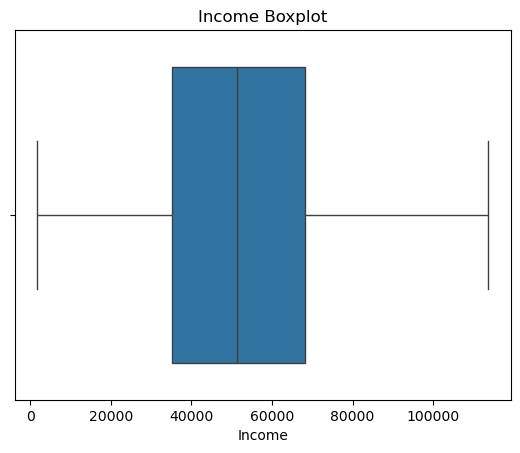

In [8]:
sns.boxplot(x=mydata['Income'])
plt.title('Income Boxplot')
plt.show()

In [9]:
# Create a new column to calculate total purchases (online, catalog, and in-store)
mydata['TotalPurchases'] = mydata[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)




In [10]:
# Create another column for total spending across all product categories
mydata['TotalSpending'] = mydata[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                              'MntSweetProducts', 'MntGoldProds']].sum(axis=1)



# Look at summary statistics for these new column

In [11]:

print(mydata[['TotalPurchases', 'TotalSpending']].describe())



       TotalPurchases  TotalSpending
count     2205.000000    2205.000000
mean        12.569615     606.821769
std          7.180350     601.675284
min          0.000000       5.000000
25%          6.000000      69.000000
50%         12.000000     397.000000
75%         18.000000    1047.000000
max         32.000000    2525.000000


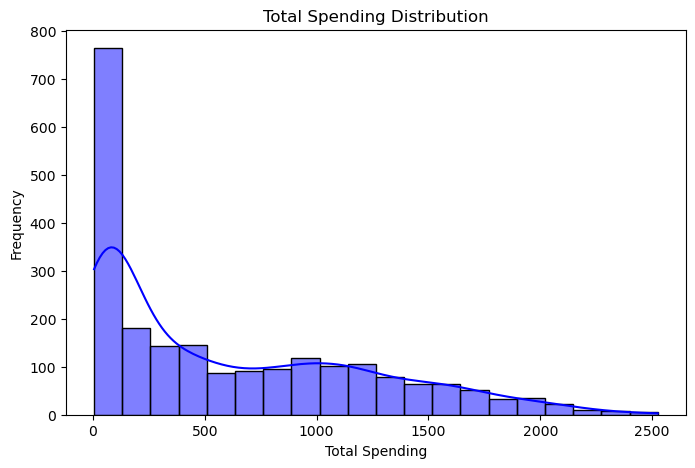

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(mydata['TotalSpending'], kde=True, color='blue', bins=20)
plt.title('Total Spending Distribution')
plt.xlabel('Total Spending')
plt.ylabel('Frequency')
plt.show()


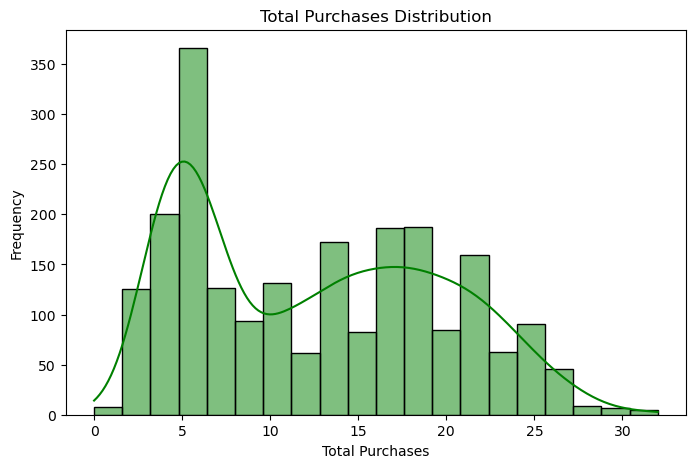

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(mydata['TotalPurchases'], kde=True, color='green', bins=20)
plt.title('Total Purchases Distribution')
plt.xlabel('Total Purchases')
plt.ylabel('Frequency')
plt.show()



# Segment 2: Analyzing Key Columns
Income Distribution:
 count      2205.000000
mean      51622.094785
std       20713.063826
min        1730.000000
25%       35196.000000
50%       51287.000000
75%       68281.000000
max      113734.000000
Name: Income, dtype: float64


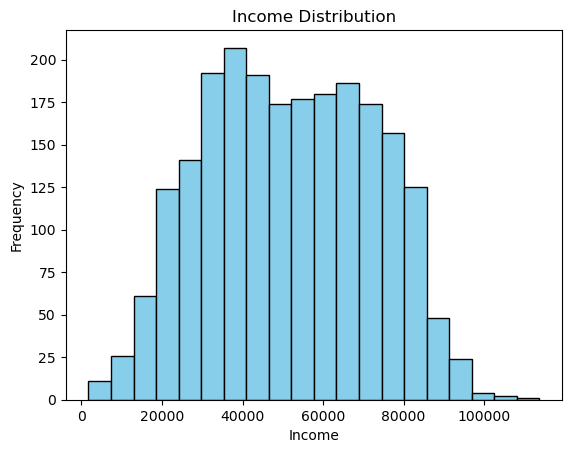

In [14]:
# Segment 2: Analyzing Key Columns
print("\n# Segment 2: Analyzing Key Columns")
print("Income Distribution:\n", mydata['Income'].describe())
plt.hist(mydata['Income'], bins=20, color='skyblue', edgecolor='black')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


In [15]:
print("\nNumber of Households with Kids and Teens")
print(mydata[['Kidhome', 'Teenhome']].sum())



Number of Households with Kids and Teens
Kidhome      975
Teenhome    1117
dtype: int64


In [16]:
# Segment 4: Spending Behavior
print("\n# Segment 4: Spending Behavior")
columns_spending = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                    'MntSweetProducts', 'MntGoldProds', 'MntTotal', 
                    'TotalSpending']
            
print("Total Spending Summary:\n", mydata[columns_spending].describe())


# Segment 4: Spending Behavior
Total Spending Summary:
           MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2205.000000  2205.000000      2205.000000      2205.000000   
mean    306.164626    26.403175       165.312018        37.756463   
std     337.493839    39.784484       217.784507        54.824635   
min       0.000000     0.000000         0.000000         0.000000   
25%      24.000000     2.000000        16.000000         3.000000   
50%     178.000000     8.000000        68.000000        12.000000   
75%     507.000000    33.000000       232.000000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  MntGoldProds     MntTotal  TotalSpending  
count       2205.000000   2205.000000  2205.000000    2205.000000  
mean          27.128345     44.057143   562.764626     606.821769  
std           41.130468     51.736211   575.936911     601.675284  
min            0.000000      0.000000     4.00000

In [17]:
# Segment 5: Purchase Channels and Frequency
print("\n# Segment 5: Purchase Channels and Frequency")
columns_purchases = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                     'NumStorePurchases', 'TotalPurchases']
print("Purchase Channel Summary:\n", mydata[columns_purchases].describe())


# Segment 5: Purchase Channels and Frequency
Purchase Channel Summary:
        NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count        2205.000000      2205.000000          2205.000000   
mean            2.318367         4.100680             2.645351   
std             1.886107         2.737424             2.798647   
min             0.000000         0.000000             0.000000   
25%             1.000000         2.000000             0.000000   
50%             2.000000         4.000000             2.000000   
75%             3.000000         6.000000             4.000000   
max            15.000000        27.000000            28.000000   

       NumStorePurchases  TotalPurchases  
count        2205.000000     2205.000000  
mean            5.823583       12.569615  
std             3.241796        7.180350  
min             0.000000        0.000000  
25%             3.000000        6.000000  
50%             5.000000       12.000000  
75%             8.000000       

# Pie chart for purchase channel preference

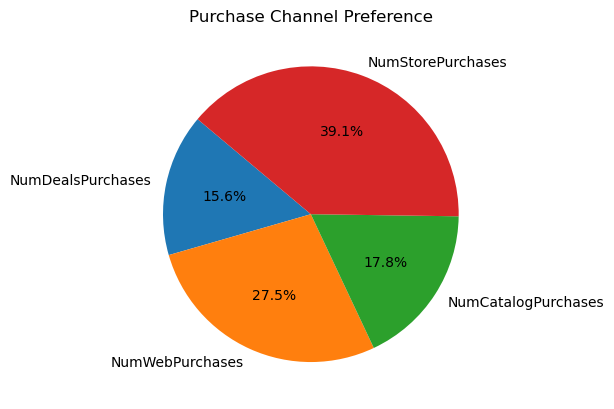

In [18]:

purchase_sums = mydata[columns_purchases[:-1]].sum()
plt.pie(purchase_sums, labels=columns_purchases[:-1], autopct='%1.1f%%', startangle=140)
plt.title('Purchase Channel Preference')
plt.show()


In [19]:
# Segment 7: Categorical Variables Analysis
print("\n# Segment 7: Categorical Variables Analysis")
columns_categorical = ['marital_Divorced', 'marital_Married', 'marital_Single', 
                       'marital_Together', 'marital_Widow']
marital_status_counts = mydata[columns_categorical].sum()
print("Marital Status Counts:\n", marital_status_counts)



# Segment 7: Categorical Variables Analysis
Marital Status Counts:
 marital_Divorced    230
marital_Married     854
marital_Single      477
marital_Together    568
marital_Widow        76
dtype: int64


# Pie chart for marital status

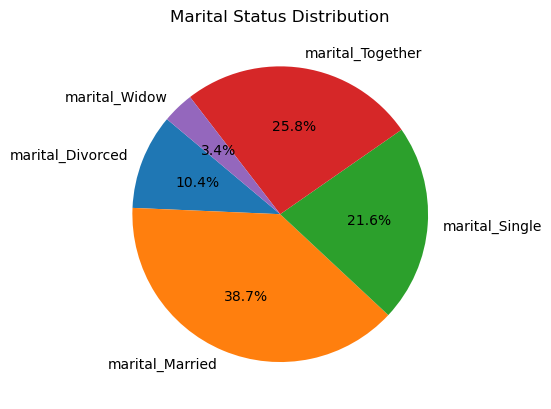

In [20]:

plt.pie(marital_status_counts, labels=columns_categorical, autopct='%1.1f%%', startangle=140)
plt.title('Marital Status Distribution')
plt.show()

# Education Analysis


Education Levels:
 education_2n Cycle       198
education_Basic           54
education_Graduation    1113
education_Master         364
education_PhD            476
dtype: int64


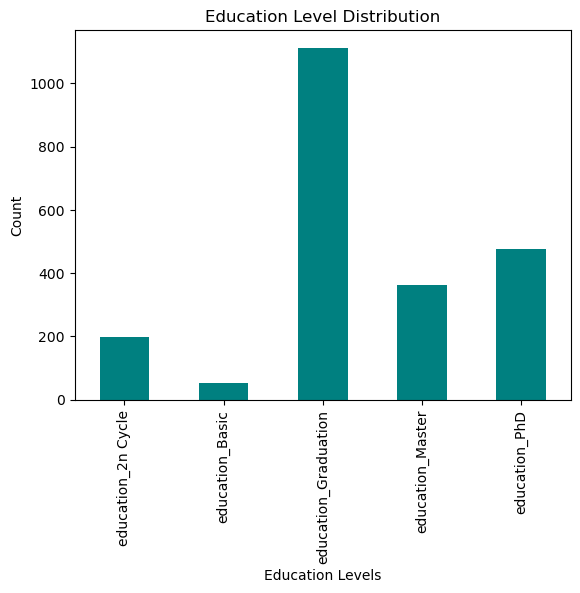

In [21]:

columns_education = ['education_2n Cycle', 'education_Basic', 'education_Graduation', 
                     'education_Master', 'education_PhD']
education_counts = mydata[columns_education].sum()
print("\nEducation Levels:\n", education_counts)

# Bar chart for education levels
education_counts.plot(kind='bar', color='teal')
plt.title('Education Level Distribution')
plt.xlabel('Education Levels')
plt.ylabel('Count')
plt.show()


#  clustering (grouping customers)

In [22]:
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = ['Recency', 'TotalSpending', 'TotalPurchases', 'Age', 'Income']
X = mydata[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


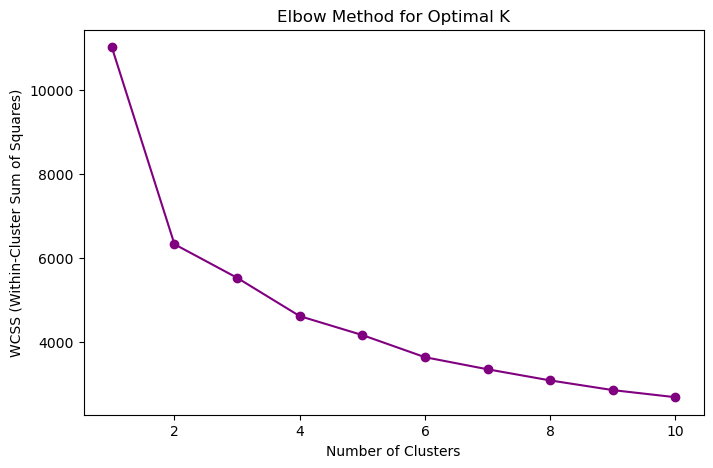

In [23]:
# Determine optimal number of clusters using WCSS
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', color='purple')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()


In [24]:
# Apply K-Means
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
mydata['Cluster'] = kmeans.fit_predict(X_scaled)


# Group by clusters and calculate mean values

In [25]:

cluster_summary = mydata.groupby('Cluster').mean()
print(cluster_summary)


               Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  \
Cluster                                                                       
0        72143.028078  0.142549  0.371490  53.626350  624.453564  58.678186   
1        35350.566722  0.723229  0.471170  24.034596   64.726524   6.370675   
2        37376.600000  0.723729  0.549153  74.910169   72.452542   6.986441   
3        67733.044037  0.078899  0.614679  44.862385  557.678899  42.315596   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster                                                                     
0             386.023758        82.043197         61.466523     74.326134   
1              28.980231         9.714992          5.756178     20.327842   
2              34.116949        10.011864          7.359322     21.471186   
3             271.677064        61.400000         43.161468     69.222018   

         NumDealsPurchases  NumWebPurchases  NumCatalogPurchas

In [26]:
mydata.head(5)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,TotalPurchases,TotalSpending,Cluster
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0,22,1617,3
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0,4,27,1
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0,20,776,3
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0,6,53,1
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0,14,422,2


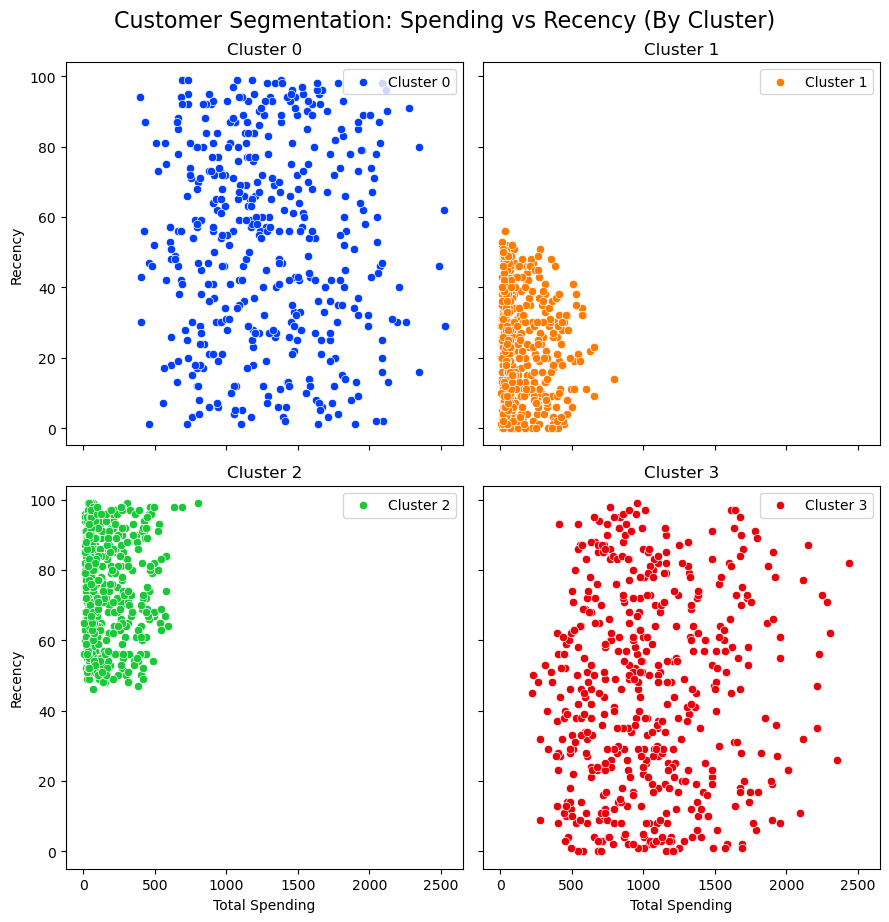

In [31]:
# each cluster represent uniqu customersr


# Set up the figure size and layout
fig, axes = plt.subplots(2, 2, figsize=(9, 9), sharex=True, sharey=True)
axes = axes.flatten()

# List of unique clusters
clusters = sorted(mydata['Cluster'].unique())
colors = sns.color_palette('bright', len(clusters))

# Plot each cluster separately
for i, cluster in enumerate(clusters):
    cluster_data = mydata[mydata['Cluster'] == cluster]  # Filter for the specific cluster
    sns.scatterplot(
        data=cluster_data,
        x='TotalSpending',
        y='Recency',
        ax=axes[i],
        color=colors[i],
        label=f'Cluster {cluster}'
    )
    axes[i].set_title(f'Cluster {cluster}')
    axes[i].set_xlabel('Total Spending')
    axes[i].set_ylabel('Recency')
    axes[i].legend(loc='upper right')

# Adjust layout for better spacing
plt.tight_layout()
plt.suptitle('Customer Segmentation: Spending vs Recency (By Cluster)', y=1.02, fontsize=16)
plt.show()


You're correct—Cluster 2 (green) is positioned in the **top-left corner**, which indicates **high recency** and **low spending**. I appreciate you pointing that out! Let me revise the insights and recommendations accordingly for Cluster 2. Here's the updated breakdown:

---

### **Updated Cluster Analysis and Insights**

#### **Cluster 0 (Blue)**  
-
  1. These customers interact frequently but make small purchases.  
  2. They might be price-sensitive or cautious buyers.  
 # Recommendations:  
  1. Offer discounts or loyalty rewards to encourage higher spending.  
  2. Introduce bundle deals or upselling strategies to increase transaction value.  

#### Cluster 1 (Orange)
  Insights 
  1. These are past customers who spent moderately but haven't interacted recently.  
  2. They are at risk of churn and need re-engagement.  

 # Recommendations 
  1. Send reactivation campaigns (e.g., special offers or personalized messages).  
  2. Highlight new products or services that align with their purchase history.  

#### Cluster 2 (Green) 

  1. These customers have interacted recently but make low-value purchases.  
  2. They may be testing products or are casual buyers.  
- # Recommendations:  
  1. Offer trial or introductory discounts to convert them into loyal customers.  
  2. Provide personalized recommendations to increase purchase frequency or value.  

#### Cluster 3 (Red)  
  1. These are high-value customers who make large purchases and are fairly recent.  
  2. They are likely loyal customers who appreciate premium offerings.  
- # Recommendations
 1. Retain these customers with exclusive benefits, such as VIP memberships or early access to new products.  
  2. Conduct surveys to understand their preferences and tailor offerings accordingly.  